In [1]:
import matplotlib

import matplotlib.font_manager as fm

font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

font_name = fm.FontProperties(fname = font_location).get_name()

matplotlib.rc('font',family = font_name)

In [7]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

In [8]:
# 데이터 불러오기
df_raw=pd.read_csv("유방암.csv", engine="python")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# 목표변수, 설명변수 데이터 지정
df_raw_y=df_raw["diagnosis"]
df_raw_x=df_raw.drop("diagnosis", axis=1, inplace=False)

#train_test_split(x: 설명변수 데이터, y: 목표변수 데이터, test_size=test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (398, 30)
train data Y size : (398,)
test data X size : (171, 30)
test data Y size : (171,)


In [10]:
# train은 0.4, train의 validation은 0.3이 되도록 train_data를 다시 분할
df_train_x, df_val_x, df_train_y, df_val_y=train_test_split(df_train_x, df_train_y, test_size=3/7)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("validation data X size : {}".format(df_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data Y size : (171,)


In [41]:
# 기본 옵션
nn_uncustomized=MLPClassifier(random_state=1234)

# hidden_layer_sizes=(100,100)
nn_uncustomized.fit(df_train_x, df_train_y)

# train accuracy
print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))

# validation accuracy
print("Accuracy on validation set:{:.3f}".format(nn_uncustomized.score(df_val_x, df_val_y)))

# test accuracy
print("Accuracy on test set:{:.3f}".format(nn_uncustomized.score(df_test_x, df_val_y)))

Accuracy on training set: 0.907
Accuracy on validation set:0.877
Accuracy on test set:0.538


#### 모델 정확도는 train 90.7%,validation 87.7%로
#### 모델은 train/test 데이터에 대해 과소적합

In [12]:
nn_uncustomized

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1234, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [13]:
# hidden layer: 은닉층 변경
# train 및 validation 정확도 결과 저장용
train_accuracy=[]
validation_accuracy=[]

# hidden_layer_sizes: 은닉층 변경
para_hidden=[20*hidden for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn=MLPClassifier(hidden_layer_sizes=v_hidden, random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    validation_accuracy.append(nn.score(df_val_x, df_val_y))
    
# 데이터 테이블로 저장
df_accuracy_hidden=pd.DataFrame()
df_accuracy_hidden["HiddenLayer"]=para_hidden
df_accuracy_hidden["TrainAccuracy"]=train_accuracy
df_accuracy_hidden["ValidationAccuracy"]=validation_accuracy

# 은닉층별 정확도 테이블
df_accuracy_hidden.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,HiddenLayer,TrainAccuracy,ValidationAccuracy
0,20,0.894,0.854
1,40,0.934,0.912
2,60,0.930,0.930
3,80,0.934,0.912
4,100,0.907,0.877
5,120,0.934,0.906
6,140,0.934,0.906
7,160,0.912,0.877


In [15]:
# hidden layer: 은닉층 변경
# train 및 validation 정확도 결과 저장용
train_accuracy=[]
validation_accuracy=[]

# hidden_layer_sizes: 은닉층 변경
para_hidden=[20*hidden for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn=MLPClassifier(hidden_layer_sizes=(v_hidden, v_hidden), random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    validation_accuracy.append(nn.score(df_val_x, df_val_y))
    
# 데이터 테이블로 저장
df_accuracy_hidden=pd.DataFrame()
df_accuracy_hidden["HiddenLayer"]=para_hidden
df_accuracy_hidden["TrainAccuracy"]=train_accuracy
df_accuracy_hidden["ValidationAccuracy"]=validation_accuracy

# 은닉층별 정확도 테이블
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,ValidationAccuracy
0,20,0.938,0.901
1,40,0.947,0.906
2,60,0.921,0.912
3,80,0.872,0.860
4,100,0.930,0.912
5,120,0.943,0.912
6,140,0.934,0.912
7,160,0.744,0.778


#### 은닉층 1개, 노드 20~160에서 노드가 60개일 때 validation accuracy가 0.930으로 가장 높음
#### 은닉층 2개, 노드 20~160에서 노드가 60개일 때 validation accuracy가 0.912로 가장 높음
#### 은닉층 1개 선택

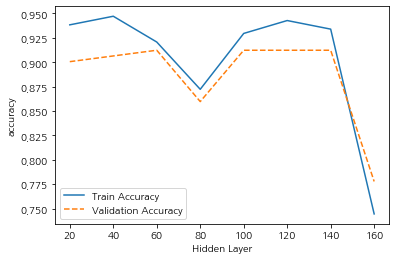

In [17]:
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_hidden, validation_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Hidden Layer")
plt.legend()

In [25]:
# train 및 test 정확도 결과 저장용
train_accuracy=[]
validation_accuracy=[]

# activation 변경
para_function=["logistic", "tanh", "relu"]

for v_function in para_function:
    nn=MLPClassifier(activation=v_function, hidden_layer_sizes=60, random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    validation_accuracy.append(nn.score(df_val_x, df_val_y))
    
# 데이터 테이블로 저장
df_accuracy_function=pd.DataFrame()
df_accuracy_function["ActivationFunction"]=para_function
df_accuracy_function["TrainAccuracy"]=train_accuracy
df_accuracy_function["ValidationAccuracy"]=validation_accuracy

# activation function별 정확도 테이블
df_accuracy_function.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,ActivationFunction,TrainAccuracy,ValidationAccuracy
0,logistic,0.938,0.912
1,tanh,0.934,0.936
2,relu,0.930,0.930


#### tanh 함수 적용시 모델의 정확도가 0.936으로 가장 높다. 그러나 scale 변환 후 모델 성능을 비교해볼 필요가 있다.

In [19]:
# standardscaler 설명변수 scale 변경
# 변수명 저장
v_feature_name=df_train_x.columns

# standardscaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [20]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x=train_test_split(df_scaled, test_size=0.3, random_state=1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (398, 30)
test data X size : (171, 30)


In [21]:
# train은 0.4, train의 validation은 0.3이 되도록 train_data를 다시 분할
df_scaled_train_x, df_scaled_val_x=train_test_split(df_scaled_train_x, test_size=3/7)

print("train data X size : {}".format(df_scaled_train_x.shape))

print("validation data X size : {}".format(df_scaled_val_x.shape))


train data X size : (227, 30)
validation data X size : (171, 30)


In [22]:
# scale 조절 후 SVC 모델 재실행
# scale이 조정된 데이터로 새로운 모델 생성
nn_scaled=MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)

# train set 정확도
print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))

# test set 정확도
print("Accuracy on validation set: {:.3f}".format(nn_scaled.score(df_scaled_val_x, df_val_y)))

Accuracy on training set: 0.811
Accuracy on validation set: 0.620


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#### 기존의 인공신경망 모델의 validation accuracy는 87.7%
#### scale이 조정된 인공신경망 모델의 validation accuracy는 62.0%로 scale된 모형의 정확도가 더 낮다.

In [29]:
# hidden layer: 은닉층 변경

# train 및 test 정확도 결과 저장용
train_accuracy=[]
validation_accuracy=[]

# hidden_layer_size: 은닉층 변경
para_hidden=[10*hidden for hidden in range(1,11)]

for v_hidden in para_hidden:
    nn=MLPClassifier(hidden_layer_sizes=v_hidden, random_state=1234)

    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    validation_accuracy.append(nn.score(df_scaled_val_x, df_val_y))\
    
# 데이터 테이블로 저장
df_accuracy_hidden=pd.DataFrame()
df_accuracy_hidden["HiddenLayer"]=para_hidden
df_accuracy_hidden["TrainAccuracy"]=train_accuracy
df_accuracy_hidden["ValidationAccuracy"]=validation_accuracy

# 은닉층별 정확도 테이블
df_accuracy_hidden.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

,HiddenLayer,TrainAccuracy,ValidationAccuracy
0,10,0.656,0.608
1,20,0.700,0.678
2,30,0.749,0.596
3,40,0.727,0.661
4,50,0.744,0.637
5,60,0.767,0.608
6,70,0.758,0.602
7,80,0.811,0.591
8,90,0.797,0.573
9,100,0.811,0.620


In [30]:
# hidden layer: 은닉층 변경

# train 및 test 정확도 결과 저장용
train_accuracy=[]
validation_accuracy=[]

# hidden_layer_size: 은닉층 변경
para_hidden=[10*hidden for hidden in range(1,11)]

for v_hidden in para_hidden:
    nn=MLPClassifier(hidden_layer_sizes=(v_hidden, v_hidden), random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    validation_accuracy.append(nn.score(df_scaled_val_x, df_val_y))\
    
# 데이터 테이블로 저장
df_accuracy_hidden=pd.DataFrame()
df_accuracy_hidden["HiddenLayer"]=para_hidden
df_accuracy_hidden["TrainAccuracy"]=train_accuracy
df_accuracy_hidden["ValidationAccuracy"]=validation_accuracy

# 은닉층별 정확도 테이블
df_accuracy_hidden.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

,HiddenLayer,TrainAccuracy,ValidationAccuracy
0,10,0.687,0.602
1,20,0.780,0.678
2,30,0.846,0.608
3,40,0.885,0.620
4,50,0.947,0.591
5,60,0.965,0.567
6,70,0.956,0.602
7,80,0.969,0.579
8,90,0.982,0.585
9,100,0.982,0.608


#### 은닉층 1개, 노드 20~160에서 노드가 20개일 때 validation accuracy가 0.678로 가장 높음
#### 은닉층 2개, 노드 20~160에서 노드가 20개일 때 validation accuracy가 0.678로 가장 높음
#### 은닉층 1개 선택

In [33]:
# activation 활성화 함수 변수

# train 및 test 정확도 결과 저장용
train_accuracy=[]
validation_accuracy=[]
# activation 변경
para_function=["logistic", "tanh", "relu"]

for v_function in para_function:
    nn=MLPClassifier(activation=v_function, hidden_layer_sizes=20, random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    validation_accuracy.append(nn.score(df_scaled_val_x, df_val_y))
    
# 데이터 테이블로 저장
df_accuracy_function=pd.DataFrame()
df_accuracy_function["ActivationFunction"]=para_function
df_accuracy_function["TrainAccuracy"]=train_accuracy
df_accuracy_function["ValidationAccuracy"]=validation_accuracy

# activation function 별 정확도 테이블
df_accuracy_function.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,ActivationFunction,TrainAccuracy,ValidationAccuracy
0,logistic,0.617,0.655
1,tanh,0.700,0.655
2,relu,0.700,0.678


#### relu 함수의 모델이 가장 높은 정확도 0.678을 보임.

In [36]:
# solver: 가중치 최적화 변경
# train 및 test 정확도 결과 저장용
train_accuracy=[]
validation_accuracy=[]
# solver 변경
para_solver=["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn=MLPClassifier(solver=v_solver, activation="relu", hidden_layer_sizes=20, random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    validation_accuracy.append(nn.score(df_scaled_val_x, df_val_y))
    
# 데이터 테이블로 저장
df_accuracy_solver=pd.DataFrame()
df_accuracy_solver["Solver"]=para_solver
df_accuracy_solver["TrainAccuracy"]=train_accuracy
df_accuracy_solver["ValidationAccuracy"]=validation_accuracy

# solver별 정확도 테이블
df_accuracy_solver.round(3)


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Solver,TrainAccuracy,ValidationAccuracy
0,lbfgs,1.000,0.538
1,sgd,0.634,0.655
2,adam,0.700,0.678


#### adam 최적화 모델이 가장 높은 정확도를 보임. 따라서 solver=adam으로 지정

In [38]:
# 새로운 MLPClassifier 모델 평가
# Mini Batch 변경

# train 및 test 정확도 결과 저장용
train_accuracy=[]
validation_accuracy=[]

# mini batch 변경
para_batch=[20*batch for batch in range(1,10)]

for v_batch in para_batch:
    nn=MLPClassifier(batch_size=v_batch, solver="adam", activation="relu",
                    hidden_layer_sizes=20, random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    validation_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_batch=pd.DataFrame()
df_accuracy_batch["Mini Batch"]=para_batch
df_accuracy_batch["TrainAccuracy"]=train_accuracy
df_accuracy_batch["ValidationAccuracy"]=validation_accuracy

# Mini Batch Size별 정확도 테이블
df_accuracy_batch.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

,Mini Batch,TrainAccuracy,ValidationAccuracy
0,20,0.815,0.491
1,40,0.789,0.520
2,60,0.740,0.532
3,80,0.740,0.550
4,100,0.709,0.538
5,120,0.736,0.550
6,140,0.736,0.550
7,160,0.731,0.544
8,180,0.709,0.538


#### mini batch 크기가 80일 때 validation accuracy가 가장 높으므로 80 선택

In [40]:
# 결론 도출
# 최종 모델 선택

nn_final=MLPClassifier(hidden_layer_sizes=20, activation="relu", solver="adam",
                       batch_size=80, random_state=1234)
nn_final.fit(df_scaled_train_x, df_train_y)

# 평가
y_pred=nn_final.predict(df_scaled_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(nn_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# precision 
print("Precision: {:.3f}".format(82/(82+54)))

Accuracy on training set: 0.740
Accuracy on test set: 0.550

Confusion matrix: 
[[82 23]
 [54 12]]
Precision: 0.603


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#### test accuracy는 55.0%로 기본 옵션의 모형의 53.8%보다 높다. 
#### train accuray는 74.0%로 test accuracy보다 약 20% 높다.
#### Confusion matrix로부터 구한 유방암 환자의 정밀도(precision)은 60.3%이다. 즉, 암 환자가 암환자임을 정확하게 밝혀낼 수 있는 확률은 60.3%이다.